In [8]:
# var inspector (install in anaconda prompt):
#   conda install -c conda-forge jupyterlab-variableinspector

In [9]:
# %conda install tensorflow
# %conda install numpy
# %conda install pandas
# %conda install -c conda-forge matplotlib
# %conda install keras
# %conda install Pillow

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6687421868738959453]

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [94]:
INPUT_HEIGHT = 270
INPUT_WIDTH = 480
INPUT_CHANNEL = 3

In [230]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
# encoding
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(INPUT_HEIGHT, INPUT_WIDTH, 3), padding='same'))
model.add(layers.MaxPooling2D((5, 5), padding='same'))
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), padding='same'))
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
# decoding
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(layers.UpSampling2D((3, 3)))
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.UpSampling2D((5, 5)))
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

# inputs = tf.keras.layers.Input(shape=(INPUT_HEIGHT,INPUT_WIDTH, INPUT_CHANNEL))

# x = layers.Conv2D(32, (5, 5), activation='relu', padding='same')(inputs)
# x = layers.MaxPooling2D((5, 5), padding='same')(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((3, 3), padding='same')(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D((3, 3))(x)
# x = layers.Conv2D(16, (3, 3), activation='relu', padding="same")(x)
# x = layers.UpSampling2D((5, 5))(x)
# decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model = tf.keras.Model(inputs, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 270, 480, 3)]     0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 270, 480, 32)      2432      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 54, 96, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 54, 96, 8)         2312      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 18, 32, 8)         0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 18, 32, 8)         584       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 9, 16, 8)          0   

In [216]:
x_dir = 'data/stimuli.out/'
x = x_from_dir(x_dir)
y_dir = 'data/heatmap/'
y = y_from_dir(y_dir)

In [220]:
# slice all data
TRAIN_SIZE = 270
x_train = x[:TRAIN_SIZE]
x_test = x[TRAIN_SIZE:]
y_train = y[:TRAIN_SIZE]
y_test = y[TRAIN_SIZE:]

In [231]:
model.fit(x_train, y_train, batch_size=10, epochs=5)

Epoch 1/5
27/27 [==============================] - 5s 155ms/step - loss: 0.0000e+00 - accuracy: 0.1084
Epoch 2/5
27/27 [==============================] - 4s 154ms/step - loss: 0.0000e+00 - accuracy: 0.1084
Epoch 3/5
27/27 [==============================] - 4s 153ms/step - loss: 0.0000e+00 - accuracy: 0.1084
Epoch 4/5
27/27 [==============================] - 4s 151ms/step - loss: 0.0000e+00 - accuracy: 0.1084
Epoch 5/5
27/27 [==============================] - 4s 164ms/step - loss: 0.0000e+00 - accuracy: 0.1084


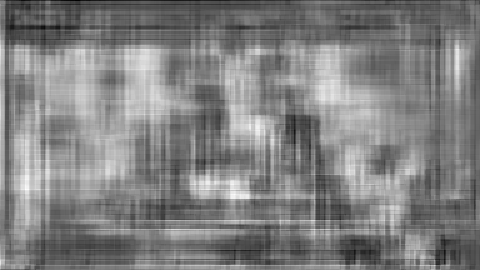

In [232]:
y_pred = model.predict(x_test)
pred_img = array_to_img(y_pred[3])
pred_img

In [208]:
import glob

# FIXME: tf.data.Dataset maybe faster
# e.g. dir_name = 'data/stimuli.out/'
def x_from_dir(dir_name):
    x_paths = glob.glob(dir_name + '*.jpg', recursive=False)
    
    # initialize
    first_img = load_img(x_paths[0], target_size=(INPUT_HEIGHT, INPUT_WIDTH))
    x = img_to_array(first_img).reshape(1,INPUT_HEIGHT,INPUT_WIDTH,INPUT_CHANNEL)
    # remaining
    for path in x_paths[1:]:
        img = load_img(path, target_size=(INPUT_HEIGHT, INPUT_WIDTH))
        arr = img_to_array(img).reshape(1,INPUT_HEIGHT,INPUT_WIDTH, INPUT_CHANNEL)
        x = np.append(x, arr, axis=0)

    return x / 255

# FIXME: tf.data.Dataset maybe faster
# e.g. dir_name = 'data/heatmap/'
def y_from_dir(dir_name):
    y_paths = glob.glob(dir_name + '*_heatmap.png', recursive=False)
    
    # initialize
    first_img = load_img(y_paths[0], color_mode='grayscale', target_size=(INPUT_HEIGHT, INPUT_WIDTH))
    y = img_to_array(first_img).reshape(1,INPUT_HEIGHT,INPUT_WIDTH,1)
    # remaining
    for path in y_paths[1:]:
        img = load_img(path, color_mode='grayscale', target_size=(INPUT_HEIGHT, INPUT_WIDTH))
        arr = img_to_array(img).reshape(1,INPUT_HEIGHT,INPUT_WIDTH,1)
        y = np.append(y, arr, axis=0)

    return y / 256